<a href="https://colab.research.google.com/github/Garik-ctrl/Z4088/blob/master/2025-04-02-Classical_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata-profiling

In [3]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv('train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
profile=ProfileReport(data,title='Pandas Profiling Report')
profile.to_notebook_iframe()

In [10]:
missing=data.isnull().sum()
missing =missing[missing>0].sort_values(ascending=False)
missing

,0
Cabin,687
Age,177
Embarked,2


In [11]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [13]:
num_missing=missing.index[data[missing.index].dtypes!='object']
num_missing

Index(['Age'], dtype='object')

In [14]:
from sklearn.impute import SimpleImputer

### doplnění průměrem

In [16]:
imputer_mean=SimpleImputer(strategy='mean')
data_mean=data.copy()
data_mean[num_missing]=imputer_mean.fit_transform(data_mean[num_missing])

In [18]:
imputer_median=SimpleImputer(strategy='median')
data_median=data.copy()
data_median[num_missing]=imputer_median.fit_transform(data_median[num_missing])

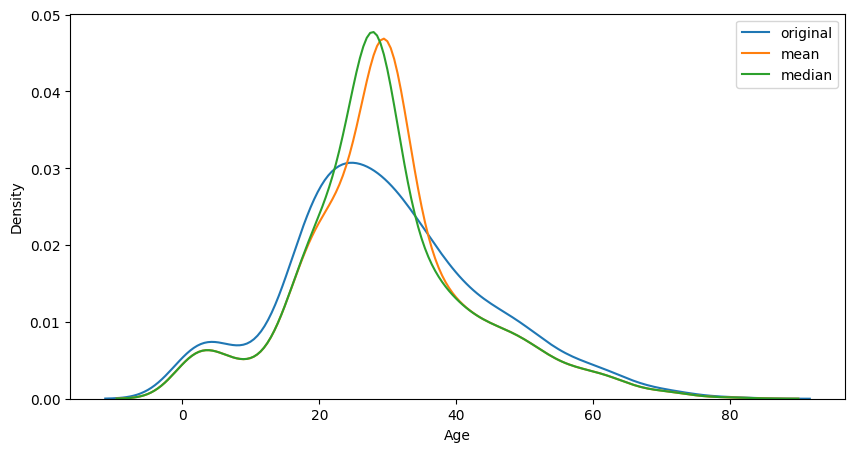

In [21]:
for col in num_missing:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data[col],label='original')
    sns.kdeplot(data_mean[col],label='mean')
    sns.kdeplot(data_median[col],label='median')
    plt.legend()
    plt.show()

In [31]:
data['Fare']=data.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
vstupy=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
vystup='Survived'

X=data[vstupy]
y=data[vystup]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
ciselne_vstupy=['Pclass','Age','SibSp','Parch','Fare']
kategoricke_vstupy=['Sex','Embarked']

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [39]:
ciselny_transformator=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [40]:
kategoricke_transformator=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [41]:
predzpracovani=ColumnTransformer(transformers=[
    ('ciselne',ciselny_transformator,ciselne_vstupy),
    ('kategoricke',kategoricke_transformator,kategoricke_vstupy)
])

In [44]:
model=Pipeline([
    ('predzpracovani',predzpracovani),
    ('model',RandomForestClassifier())
])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
model.fit(X_train,Y_train)

Pipeline(steps=[('predzpracovani',
                 ColumnTransformer(transformers=[('ciselne',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('kategoricke',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', RandomForestClassifier())])

In [50]:
predikce=model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
print(accuracy_score(Y_test,predikce))

0.8156424581005587
